In [1]:
#Loading dataset
import pandas as pd 
stockprice_csv=pd.read_csv(r"C:\Users\KIIT\Downloads\stock_price.csv")
df=pd.DataFrame(stockprice_csv)
print(df)

              date   open   high    low  close    volume Name
0       2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1       2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2       2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3       2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4       2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
...            ...    ...    ...    ...    ...       ...  ...
619035  2018-02-01  76.84  78.27  76.69  77.82   2982259  ZTS
619036  2018-02-02  77.53  78.12  76.73  76.78   2595187  ZTS
619037  2018-02-05  76.64  76.92  73.18  73.83   2962031  ZTS
619038  2018-02-06  72.74  74.56  72.13  73.27   4924323  ZTS
619039  2018-02-07  72.70  75.00  72.69  73.86   4534912  ZTS

[619040 rows x 7 columns]


In [2]:
print(df.columns)
print(df.info())
print(df.shape)

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB
None
(619040, 7)


In [3]:
#Data Cleaning
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
import numpy as np
#Mean, Median & Standard Deviation of Stock Prices
mean = np.mean(df['close'])
median = np.median(df['close'])
std_dev = np.std(df['close'])
print("Mean Closing Price: ", mean)
print("Median Closing Price: ", median)
print("Standard Deviation of Closing Prices: ", std_dev)

Mean Closing Price:  83.04330497876515
Median Closing Price:  62.62
Standard Deviation of Closing Prices:  97.3888344926075


In [7]:
#Stock with Highest & Lowest Opening Price
max_op= np.max(df['open'])
min_op = np.min(df['open'])
print("Highest Opening Price: ", max_op)
print("Lowest Opening Price: ",min_op)


Highest Opening Price:  2044.0
Lowest Opening Price:  1.62


In [8]:
#Stock with Highest & Lowest Closing Price
max_cp= np.max(df['close'])
min_cp = np.min(df['close'])
print("Highest Closing Price: ", max_cp)
print("Lowest Closing Price: ",min_cp)

Highest Closing Price:  2049.0
Lowest Closing Price:  1.59


In [9]:
#Stock with highest one day percentage increase
df['daily_return'] = df.groupby('Name')['close'].pct_change()
df.loc[df['daily_return'] == df['daily_return'].max()]

,date,open,high,low,close,volume,Name,daily_return
349477,2016-05-20,35.8,36.32,35.55,35.91,997954,LNT,1.009513


In [10]:
#Top 5 stocks with the highest average closing price
df.groupby('Name')['close'].mean().sort_values(ascending=False).head(5)

Name
PCLN     1312.873538
GOOG      725.403353
GOOGL     682.233847
AZO       619.703654
AMZN      576.880041
Name: close, dtype: float64

In [11]:
#Stock with the highest and lowest total trading volume
df['Total Trading Volume'] = df.groupby('Name')['volume'].pct_change()
df.loc[df['Total Trading Volume'] == df['Total Trading Volume'].max()]  #Highest

,date,open,high,low,close,volume,Name,daily_return,Total Trading Volume
598238,2015-06-30,61.33,61.4,60.33,60.9,1815537,WRK,0.001645,6050.79


In [12]:
df.loc[df['Total Trading Volume'] == df['Total Trading Volume'].min()]  #Lowest

,date,open,high,low,close,volume,Name,daily_return,Total Trading Volume
82951,2017-07-28,67.26,67.26,67.26,67.26,101,BHF,-0.010882,-0.992213


In [13]:
#Trading days available for each stock
df.groupby('Name')['date'].count().reset_index(name='Avl Days')

,Name,Avl Days
0,A,1259
1,AAL,1259
2,AAP,1259
3,AAPL,1259
4,ABBV,1259
...,...,...
500,XYL,1259
501,YUM,1259
502,ZBH,1259
503,ZION,1259


In [14]:
#Stocks with the highest price growth over the dataset period
df_first = df.groupby('Name').first()['close']
df_last = df.groupby('Name').last()['close']
price_growth = ((df_last - df_first) / df_first).sort_values(ascending=False)
price_growth.head(5).reset_index(name='Price Growth')

,Name,Price Growth
0,NVDA,17.496362
1,NFLX,9.233321
2,ALGN,6.159487
3,EA,6.084053
4,STZ,5.723705


In [15]:
#Date with the Highest Trading Volume
df['daily_change'] = df['high'] - df['low']
df[df['daily_change'] == df['daily_change'].max()]

,date,open,high,low,close,volume,Name,daily_return,Total Trading Volume,daily_change
47643,2018-02-05,1402.62,1458.98,1320.72,1390.0,11494985,AMZN,-0.027938,0.03319,138.26


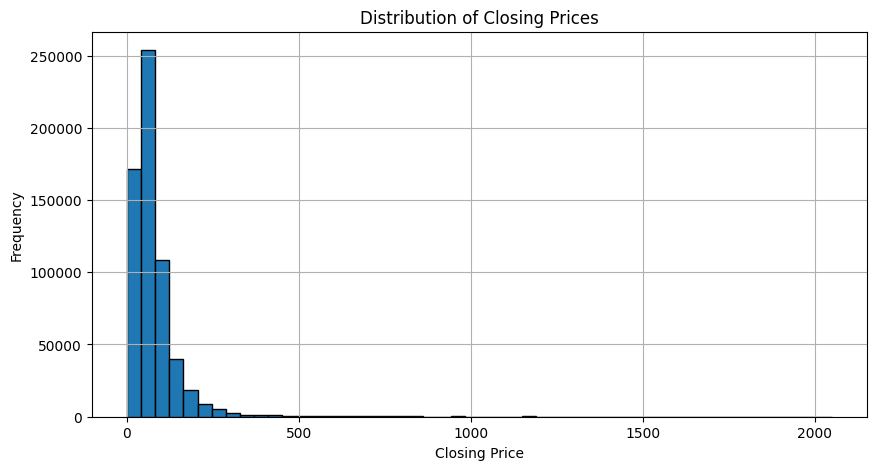

In [16]:
import matplotlib.pyplot as plt
#Distribution of Closing Prices
plt.figure(figsize=(10, 5))
df['close'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

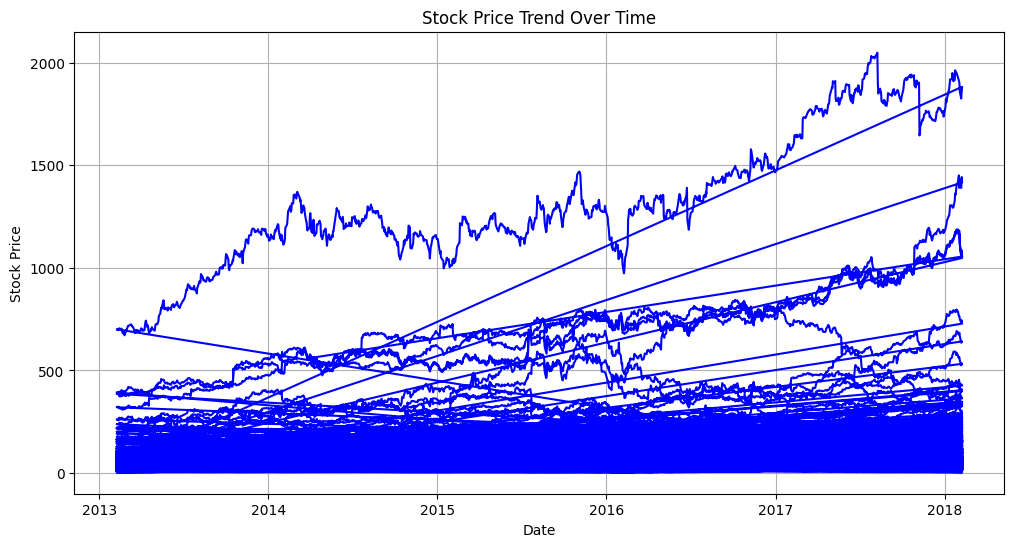

In [17]:
#Stock Prices Over Time (Trend Analysis)
df['date'] = pd.to_datetime(df['date']) 

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Closing Price', color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Trend Over Time")
plt.grid(True)
plt.show()

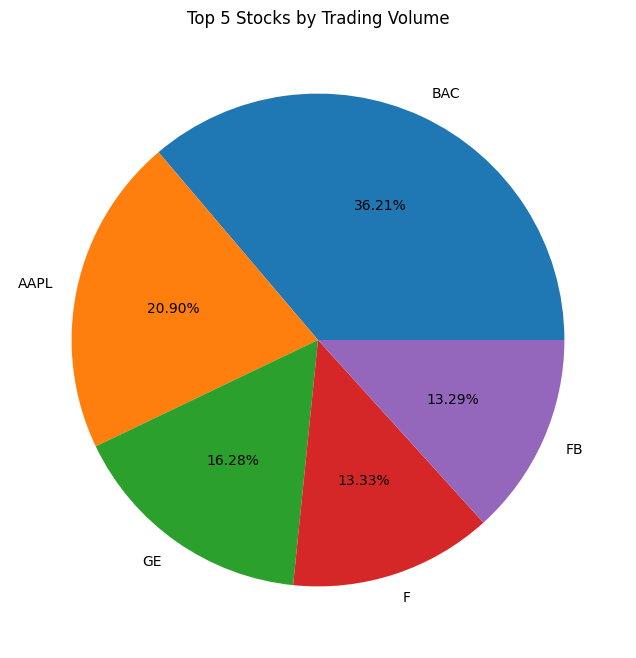

In [18]:
#Percentage Share of Trading Volume by Stock
top_stocks = df.groupby('Name')['volume'].sum().nlargest(5)  # Top 5 stocks by volume

plt.figure(figsize=(8, 8))
plt.pie(top_stocks, labels=top_stocks.index, autopct='%2.2f%%')
plt.title("Top 5 Stocks by Trading Volume")
plt.show()

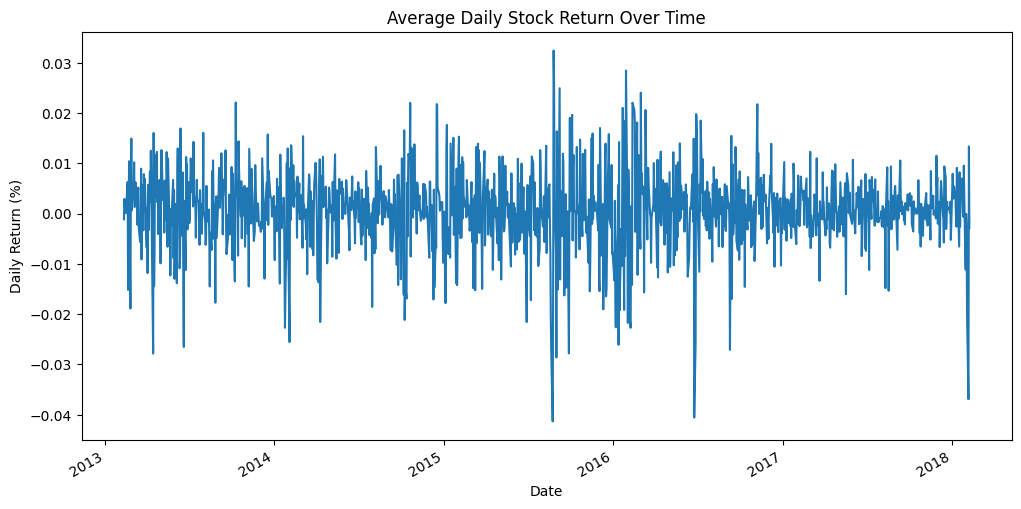

In [19]:
#Daily Percentage Change in Stock Price
df['daily_return'] = df.groupby('Name')['close'].pct_change()

plt.figure(figsize=(12, 6))
df.groupby('date')['daily_return'].mean().plot()
plt.title("Average Daily Stock Return Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.show()

In [20]:
#Technical Statistics based on the dataset

# First few rows of the dataset

print("First Few Rows of the Dataset:")
print(df.head())
print("\n")

# Shape of the dataset
print("Shape of the Dataset (Rows, Columns):")
print(df.shape)
print("\n")

# Column names
print("Column Names:")
print(df.columns)
print("\n")

# Column data types
print("Column Data Types:")
print(df.dtypes)
print("\n")

# Number of unique values in each column
print("Number of Unique Values in Each Column:")
print(df.nunique())
print("\n")

# Summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
print(df.describe())
print("\n")

# Summary statistics for categorical columns
print("Summary Statistics for Categorical Columns:")
print(df.describe(include=['object']))
print("\n")

# Count of non-null values in each column
print("Count of Non-Null Values in Each Column:")
print(df.count())
print("\n")

# Memory usage of the dataset
print("Memory Usage of the Dataset:")
print(df.memory_usage(deep=True))
print("\n")

# Overview of the dataset's index information
print("Index Information:")
print(df.index)
print("\n")

First Few Rows of the Dataset:
        date   open   high    low  close    volume Name  daily_return  \
0 2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL           NaN   
1 2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL     -0.019661   
2 2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL     -0.013140   
3 2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL      0.027330   
4 2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL     -0.045703   

   Total Trading Volume  daily_change  
0                   NaN          0.49  
1              0.056438          0.75  
2             -0.085116          0.41  
3              0.262552          0.69  
4              2.107354          1.80  


Shape of the Dataset (Rows, Columns):
(619029, 10)


Column Names:
Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name',
       'daily_return', 'Total Trading Volume', 'daily_change'],
      dtype='object')


Column Data Types:
date                    datetime64[ns]
open      